In [1]:
import pandas
import matplotlib
import matplotlib.pyplot
import seaborn
import scipy

TEAM_COLORS = {
    'WAL':'red',
    'ENG':'white',
    'IRE':'green',
    'FRA':'mediumblue',
    'SCO':'navy',
    'ITA':'dodgerblue'
}

TEAM_FONT_COLORS = {
    'WAL':'white',
    'ENG':'black',
    'IRE':'white',
    'FRA':'white',
    'SCO':'white',
    'ITA':'white'
}

POSITION_ORDER = ['OB', 'C', 'FH', 'SH', 'BR', 'SR', 'FR']

In [2]:
data = pandas.concat(
    pandas.read_excel(
        '../data/espn_rugby_data.xlsx',
        sheet_name=None
    ),
    ignore_index=True
)

In [3]:
data.head()

,NAME,TEAM,OPP,POS,RATING,2018,SM,SUB,T,A,...,YC,RC,MOM,5T,50M,LO,TSB,PTS,MDP,ROUND
0,B Kinghorn,SCO,ITA,OB,3,9,1,0,3,1,...,0,0,1,2,1,0,0.16,35,28,1
1,G North,WAL,FRA,OB,4,18,1,0,2,0,...,0,0,1,0,1,0,0.24,25,18,1
2,H Slade,ENG,IRE,C,3,0,1,0,2,0,...,0,0,0,2,0,0,0.10,37,14,1
3,M Vunipola,ENG,IRE,FR,5,21,1,0,0,0,...,0,0,1,5,0,0,0.23,16,12,1
4,J May,ENG,IRE,OB,4,42,1,0,1,1,...,0,0,0,1,0,0,0.61,55,11,1


In [4]:
starter_data = data[data['SM']==1]
starter_data.head()

,NAME,TEAM,OPP,POS,RATING,2018,SM,SUB,T,A,...,YC,RC,MOM,5T,50M,LO,TSB,PTS,MDP,ROUND
0,B Kinghorn,SCO,ITA,OB,3,9,1,0,3,1,...,0,0,1,2,1,0,0.16,35,28,1
1,G North,WAL,FRA,OB,4,18,1,0,2,0,...,0,0,1,0,1,0,0.24,25,18,1
2,H Slade,ENG,IRE,C,3,0,1,0,2,0,...,0,0,0,2,0,0,0.10,37,14,1
3,M Vunipola,ENG,IRE,FR,5,21,1,0,0,0,...,0,0,1,5,0,0,0.23,16,12,1
4,J May,ENG,IRE,OB,4,42,1,0,1,1,...,0,0,0,1,0,0,0.61,55,11,1


### Did players score more points against Italy?

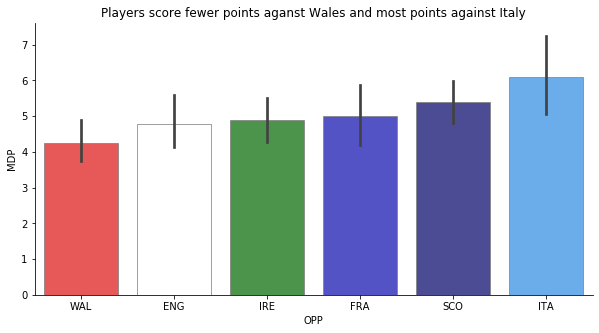

In [5]:
fig, ax = matplotlib.pyplot.subplots(figsize=(10,5))
seaborn.barplot(
    data=starter_data,
    x='OPP',
    y='MDP',
    order=TEAM_COLORS.keys(),
    palette=TEAM_COLORS.values(),
    **{
        'alpha': 0.75,
        'edgecolor': 'grey'
      }
)
seaborn.despine()
ax.set_title('Players score fewer points aganst Wales and most points against Italy')
matplotlib.pyplot.show()

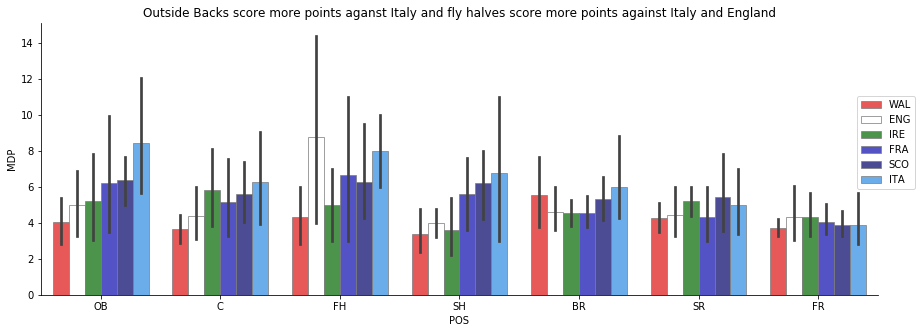

In [6]:
fig, ax = matplotlib.pyplot.subplots(figsize=(15,5))
seaborn.barplot(
    data=starter_data,
    x='POS',
    y='MDP',
    hue='OPP',
    order=POSITION_ORDER,
    hue_order=TEAM_COLORS.keys(),
    palette=TEAM_COLORS.values(),
    **{
        'alpha': 0.75,
        'edgecolor': 'grey'
      }
)
ax.legend(bbox_to_anchor=(1.05, 0.75))
seaborn.despine()
ax.set_title('Outside Backs score more points aganst Italy and fly halves score more points against Italy and England')
matplotlib.pyplot.show()

### Which position scored most points?

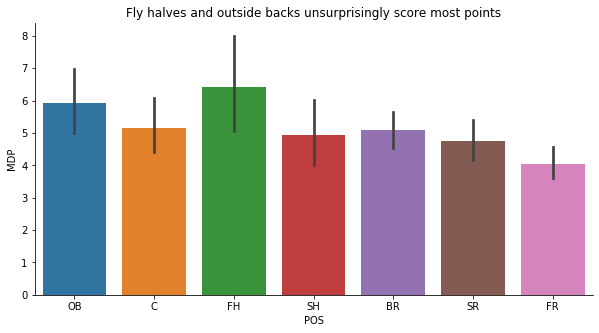

In [7]:
fig, ax = matplotlib.pyplot.subplots(figsize=(10,5))
seaborn.barplot(
    data=starter_data,
    x='POS',
    y='MDP',
    order=POSITION_ORDER
)
seaborn.despine()
ax.set_title('Fly halves and outside backs unsurprisingly score most points')
matplotlib.pyplot.show()

### Which team scored most points?

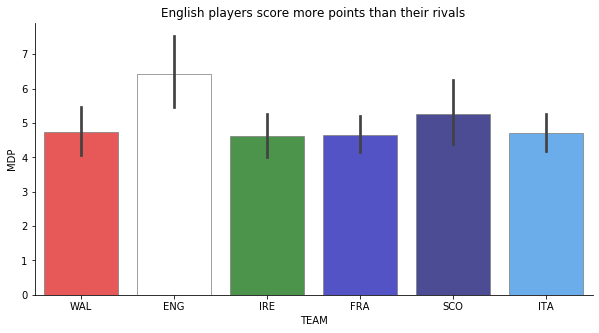

In [8]:
fig, ax = matplotlib.pyplot.subplots(figsize=(10,5))
seaborn.barplot(
    data=starter_data,
    x='TEAM',
    y='MDP',
    order=TEAM_COLORS.keys(),
    palette=TEAM_COLORS.values(),
    **{
        'alpha': 0.75,
        'edgecolor': 'grey'
      }
)
seaborn.despine()
ax.set_title('English players score more points than their rivals')
matplotlib.pyplot.show()

### Points scored by position and team

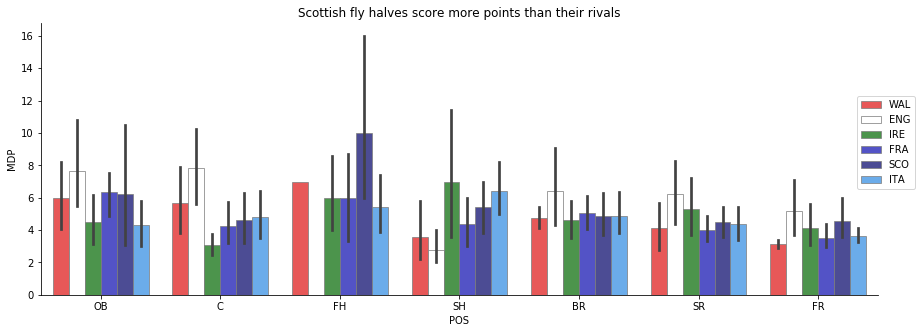

In [9]:
fig, ax = matplotlib.pyplot.subplots(figsize=(15,5))
seaborn.barplot(
    data=starter_data,
    x='POS',
    y='MDP',
    hue='TEAM',
    order=POSITION_ORDER,
    hue_order=TEAM_COLORS.keys(),
    palette=TEAM_COLORS.values(),
    **{
        'alpha': 0.75,
        'edgecolor': 'grey'
      }
)
ax.legend(bbox_to_anchor=(1.05, 0.75))
seaborn.despine()
ax.set_title('Scottish fly halves score more points than their rivals')
matplotlib.pyplot.show()

### Did 2018 scores correlate with 2019?

In [10]:
lastyear = data[data[2018]>0][['NAME',2018]].drop_duplicates()
thisyear = data.groupby('NAME')['MDP'].sum().reset_index()

In [11]:
yoy = pandas.merge(lastyear, thisyear, how='inner', on='NAME')
yoy.columns = ['NAME', '2018', '2019']

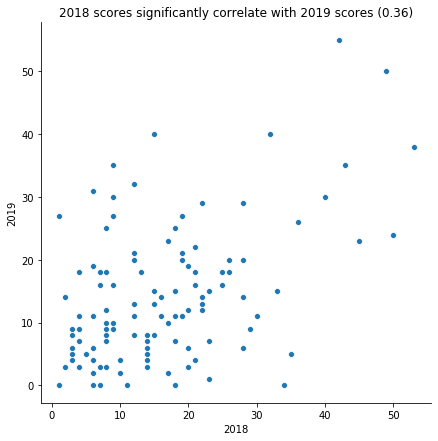

In [12]:
fig, ax = matplotlib.pyplot.subplots(figsize=(7,7))
seaborn.scatterplot(
    data=yoy,
    x='2018',
    y='2019'
)
ax.set_title('2018 scores significantly correlate with 2019 scores ({:.2f})'.format(
    scipy.stats.spearmanr(yoy['2018'], yoy['2019']).correlation
))
seaborn.despine()
matplotlib.pyplot.show()

### Does the concept of "form" exist?

In [13]:
starter_data.head()

,NAME,TEAM,OPP,POS,RATING,2018,SM,SUB,T,A,...,YC,RC,MOM,5T,50M,LO,TSB,PTS,MDP,ROUND
0,B Kinghorn,SCO,ITA,OB,3,9,1,0,3,1,...,0,0,1,2,1,0,0.16,35,28,1
1,G North,WAL,FRA,OB,4,18,1,0,2,0,...,0,0,1,0,1,0,0.24,25,18,1
2,H Slade,ENG,IRE,C,3,0,1,0,2,0,...,0,0,0,2,0,0,0.10,37,14,1
3,M Vunipola,ENG,IRE,FR,5,21,1,0,0,0,...,0,0,1,5,0,0,0.23,16,12,1
4,J May,ENG,IRE,OB,4,42,1,0,1,1,...,0,0,0,1,0,0,0.61,55,11,1


In [23]:
starter_data_round = starter_data[['NAME','MDP','ROUND']].pivot(
    index='NAME',
    values='MDP',
    columns='ROUND'
).fillna(0).reset_index()

In [32]:
paired_rounds = pandas.DataFrame()

for n in range(4):
    paired_data = starter_data_round[['NAME',n+1,n+2]].rename(
        columns={
            n+1:'previous_round',
            n+2:'current_round'
        }
    )

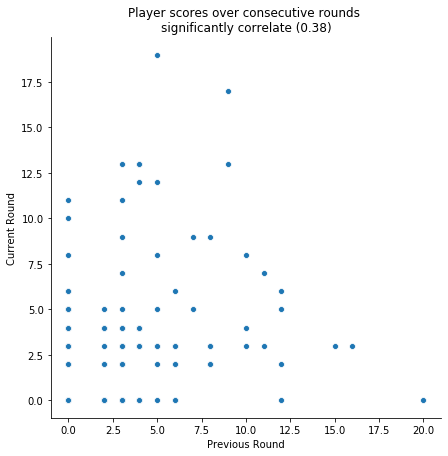

In [38]:
fig, ax = matplotlib.pyplot.subplots(figsize=(7,7))
seaborn.scatterplot(
    data=paired_data,
    x='previous_round',
    y='current_round'
)
ax.set_title('Player scores over consecutive rounds \nsignificantly correlate ({:.2f})'.format(
    scipy.stats.spearmanr(paired_data['previous_round'], paired_data['current_round']).correlation
))
ax.set_xlabel('Previous Round')
ax.set_ylabel('Current Round')
seaborn.despine()
matplotlib.pyplot.show()

### Which position gets most MOTMs?

In [46]:
motm_pos = pandas.DataFrame(
    starter_data.groupby('POS')['MOM'].sum()
).reset_index().sort_values('MOM', ascending=False)

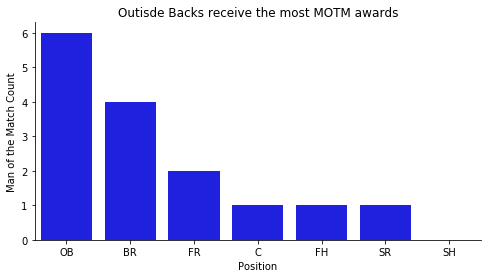

In [54]:
fig, ax = matplotlib.pyplot.subplots(figsize=(8,4))
seaborn.barplot(
    data=motm_pos,
    x='POS',
    y='MOM',
    color='blue'
)
seaborn.despine()
ax.set_xlabel('Position')
ax.set_ylabel('Man of the Match Count')
ax.set_title('Outisde Backs receive the most MOTM awards')
matplotlib.pyplot.show()